Harvian Khusnan Hafidz 

1301204303

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://github.com/HarvianKhusnan/Tugas-SG-AI/blob/68bc5c0795f95276986c5af250b6bad29d90678a/Tugas-2/Iris.csv?raw=true', usecols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Min-Max Normalization**

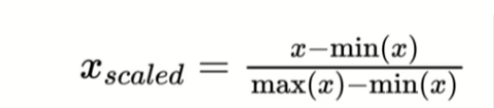

In [ ]:
def minmax (min,max,x) : 
  return (x - min) / (max-min)

In [ ]:
length = data.shape[0]
length

150

In [ ]:
def normaldf(df) : 
  sepallength = []
  sepalwidth = []
  petallength =[]
  petalwidth = []
  species = []

  #getminvalue 
  minsepallength = data['SepalLengthCm'].min()
  minsepalwidth = data['SepalWidthCm'].min()
  minpetallength = data['PetalLengthCm'].min()
  minpetalwidth = data['PetalWidthCm'].min()

  #getmaxvalue 
  maxsepallength = data['SepalLengthCm'].max()
  maxsepalwidth = data['SepalWidthCm'].max()
  maxpetallength = data['PetalLengthCm'].max()
  maxpetalwidth = data['PetalWidthCm'].max()

  for idx in range(length) :
    sepallength.append(minmax(minsepallength, maxsepallength, df["SepalLengthCm"][idx]))
    sepalwidth.append(minmax(minsepalwidth,maxsepalwidth, df['SepalWidthCm'][idx]))
    petallength.append(minmax(minpetallength, maxpetallength, df['PetalLengthCm'][idx]))
    petalwidth.append(minmax(minpetalwidth, maxpetalwidth, df['PetalWidthCm'][idx]))
    species.append(df['Species'][idx])
  
  #menggantiketerangan 
  dfNormalized = pd.DataFrame(list(zip(sepallength, sepalwidth, petallength, petalwidth, species)), 
                              columns =['SepalLengthNormal', 'SepalWidthNormal', 'PetalWidthNormal', 'PetalWidthNormal', 'Species'])
  return dfNormalized


In [ ]:
normalizeddd = normaldf(data)
normalizeddd

,SepalLengthNormal,SepalWidthNormal,PetalWidthNormal,PetalWidthNormal,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


**Z-Score Standardized**

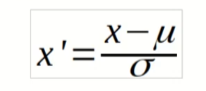

In [ ]:
def Zscore(x, miu, sigma):
  return (x-miu) / sigma 

In [ ]:
def ZscoreNorm(df) : 
  sepallength = []
  sepalwidth = []
  petallength =[]
  petalwidth = []
  species = []

  #getmeanvalue 
  meansepallength = data['SepalLengthCm'].mean()
  meansepalwidth = data['SepalWidthCm'].mean()
  meanpetallength = data['PetalLengthCm'].mean()
  meanpetalwidth = data['PetalWidthCm'].mean()

  #getsigmavalue 
  sigmasepallength = data['SepalLengthCm'].std()
  sigmasepalwidth = data['SepalWidthCm'].std()
  sigmapetallength = data['PetalLengthCm'].std()
  sigmapetalwidth = data['PetalWidthCm'].std()

  for idx in range(length) :
    sepallength.append(Zscore(meansepallength, sigmasepallength, df["SepalLengthCm"][idx]))
    sepalwidth.append(Zscore(meansepalwidth,sigmasepalwidth, df['SepalWidthCm'][idx]))
    petallength.append(Zscore(meanpetallength, sigmapetallength, df['PetalLengthCm'][idx]))
    petalwidth.append(Zscore(meanpetalwidth, sigmapetalwidth, df['PetalWidthCm'][idx]))
    species.append(df['Species'][idx])
  
  #menggantiketerangan 
  standard = pd.DataFrame(list(zip(sepallength, sepalwidth, petallength, petalwidth, species)), 
                              columns =['SepalLengthZscore', 'SepalWidthZscore', 'PetalWidthZscore', 'PetalWidthZscore', 'Species'])
  return standard

In [ ]:
standardddd = ZscoreNorm(data)
standardddd

,SepalLengthZscore,SepalWidthZscore,PetalWidthZscore,PetalWidthZscore,Species
0,0.983386,0.748687,1.424462,2.177530,Iris-setosa
1,1.023524,0.873469,1.424462,2.177530,Iris-setosa
2,1.067078,0.818877,1.534036,2.177530,Iris-setosa
3,1.090275,0.845292,1.329497,2.177530,Iris-setosa
4,1.003053,0.727890,1.424462,2.177530,Iris-setosa
...,...,...,...,...,...
145,0.748547,0.873469,0.383509,0.189350,Iris-virginica
146,0.796074,1.048162,0.398849,0.229214,Iris-virginica
147,0.771580,0.873469,0.383509,0.217753,Iris-virginica
148,0.808914,0.770708,0.369305,0.189350,Iris-virginica


Maap ya kak klo salah, bingung soalnya sepenangkapan saya aja huhuuu :")